In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [18]:
data=pd.read_csv('AAPL.csv')
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
1,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500


In [19]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1509,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500
1510,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28211100


In [20]:
data['Date']=pd.to_datetime(data['Date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1511 non-null   datetime64[ns]
 1   Open       1511 non-null   float64       
 2   High       1511 non-null   float64       
 3   Low        1511 non-null   float64       
 4   Close      1511 non-null   float64       
 5   Adj Close  1511 non-null   float64       
 6   Volume     1511 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.8 KB


In [9]:
data.isnull().values.sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034A1AA608>,
      dtype=object)

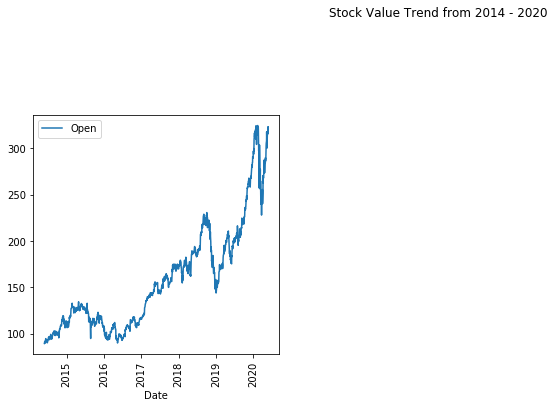

In [11]:
data.plot(x='Date',y='Open', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034B4A6408>,
      dtype=object)

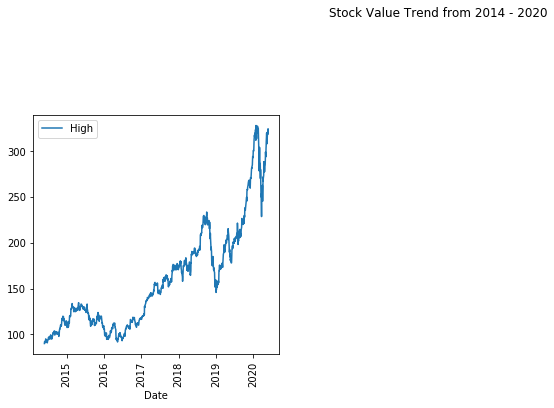

In [13]:
data.plot(x='Date',y='High', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034B2A5888>,
      dtype=object)

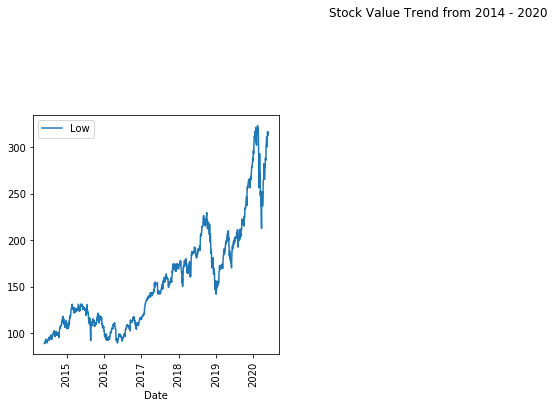

In [14]:
data.plot(x='Date',y='Low', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034B5BD6C8>,
      dtype=object)

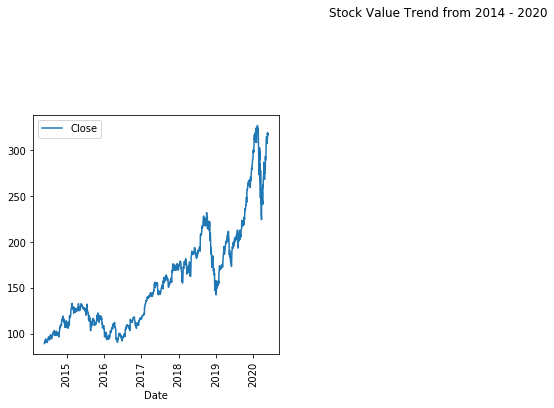

In [15]:
data.plot(x='Date',y='Close', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034C851B88>,
      dtype=object)

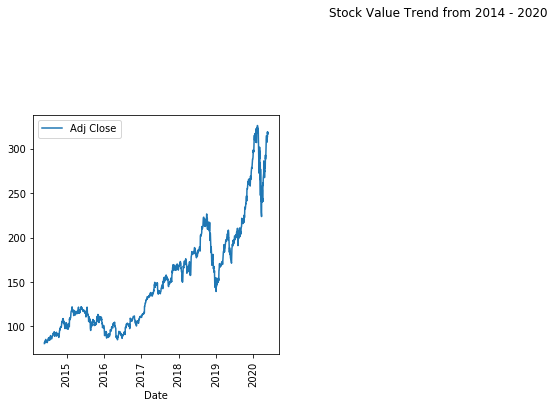

In [16]:
data.plot(x='Date',y='Adj Close', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034CB051C8>,
      dtype=object)

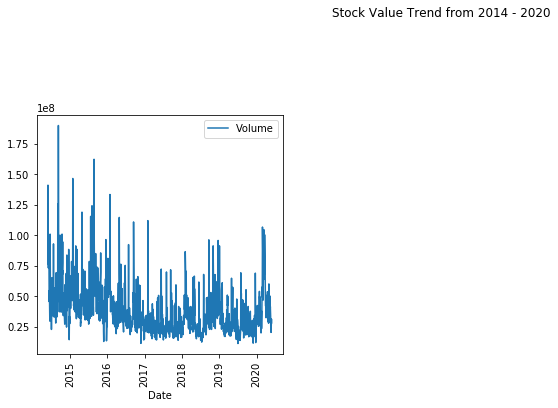

In [17]:
data.plot(x='Date',y='Volume', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2014 - 2020", rot = 90)

In [22]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday

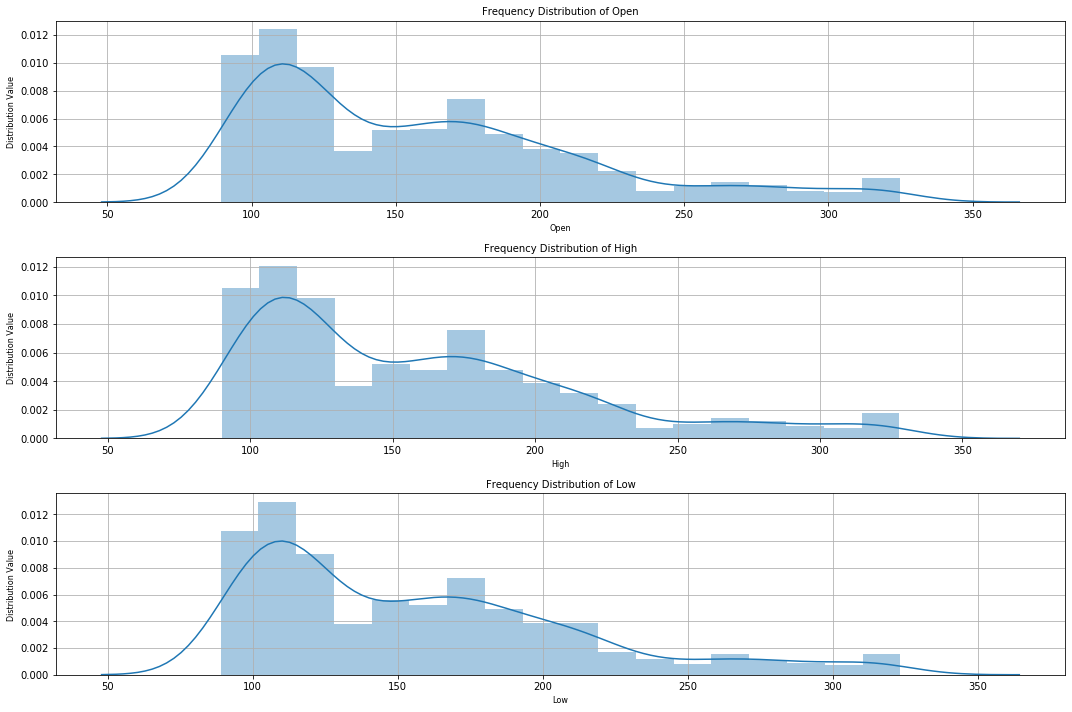

In [23]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on')

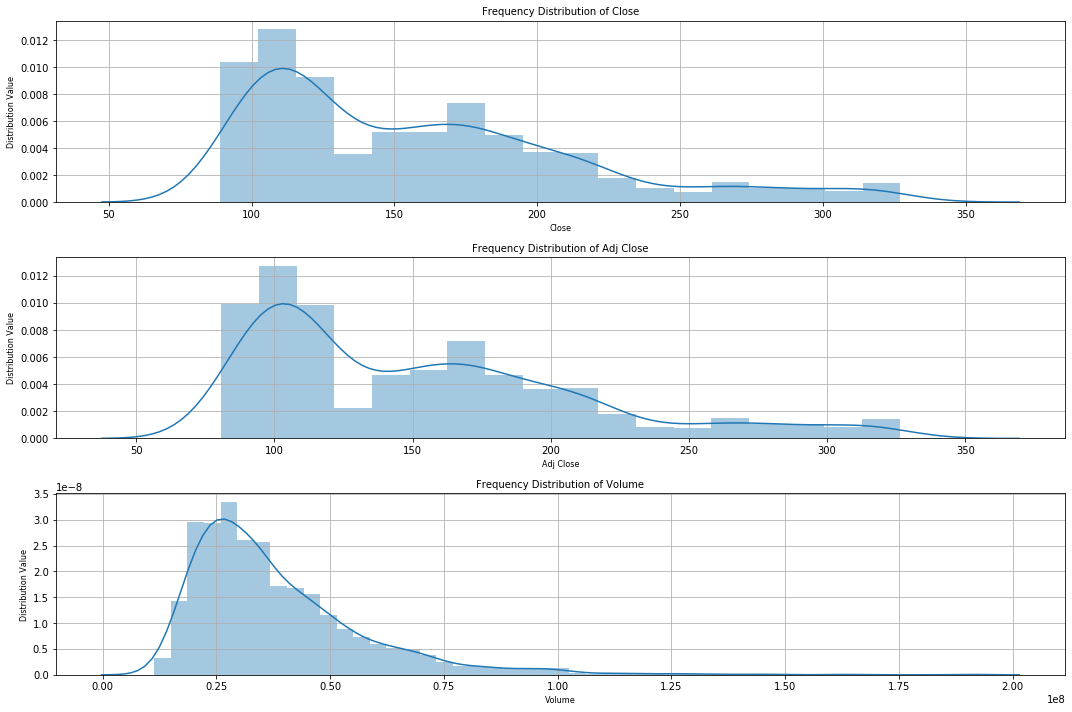

In [24]:
Column_List = ['Close', 'Adj Close', 'Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on')

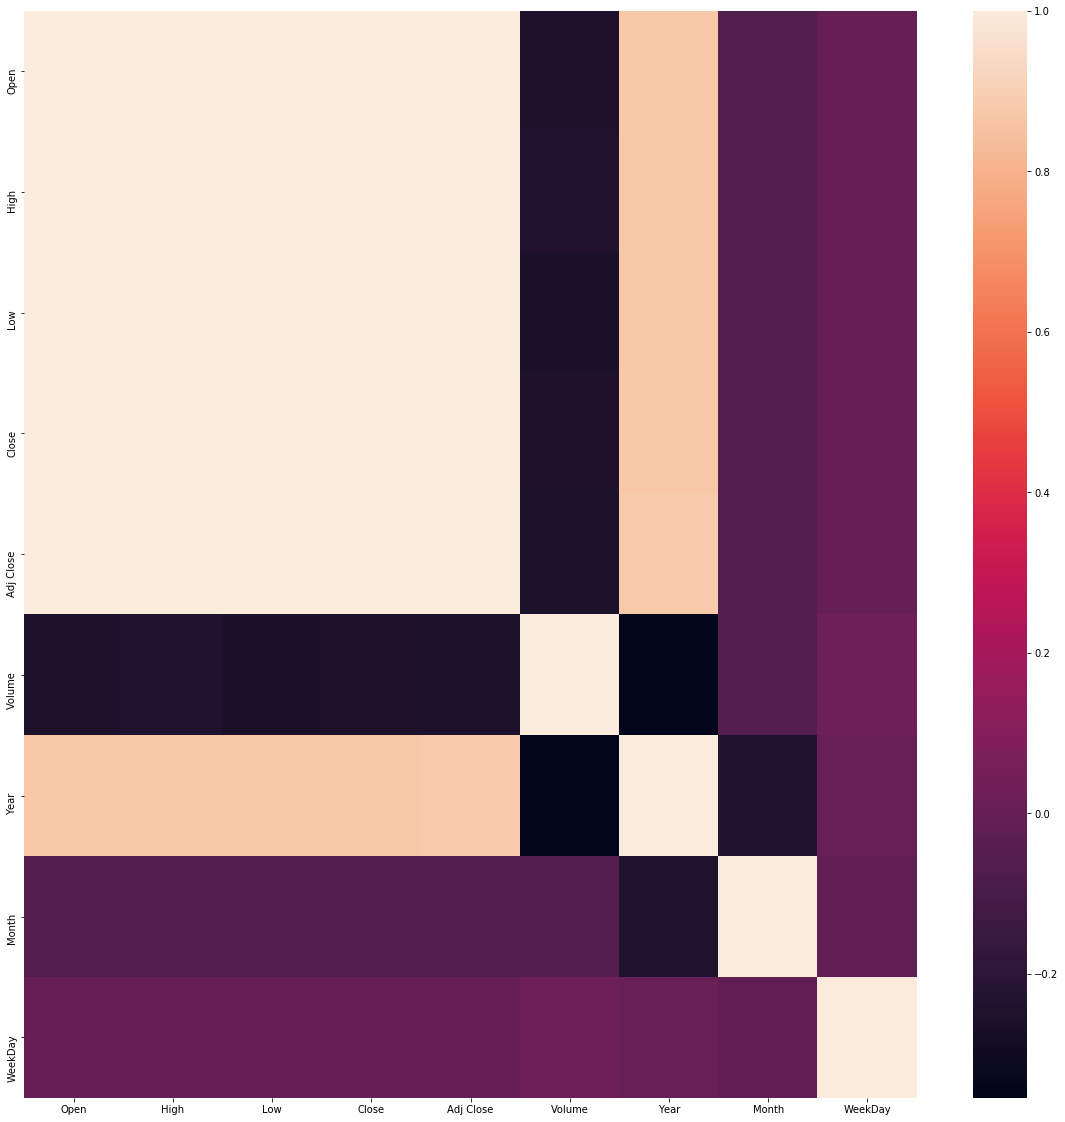

In [25]:
fig.ax=plt.subplots(figsize=(20,20))
corr_matrix=data.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)


In [26]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume,Year,Month,WeekDay
Open,1.000000,0.999564,0.999542,0.999167,0.998797,-0.249395,0.868046,-0.063864,0.003900
High,0.999564,1.000000,0.999255,0.999509,0.999188,-0.238486,0.868580,-0.066590,0.001752
Low,0.999542,0.999255,1.000000,0.999538,0.999127,-0.261818,0.868041,-0.063460,0.003445
Close,0.999167,0.999509,0.999538,1.000000,0.999611,-0.251542,0.868175,-0.065116,0.001831
Adj Close,0.998797,0.999188,0.999127,0.999611,1.000000,-0.256902,0.879106,-0.066291,0.002136
Volume,-0.249395,-0.238486,-0.261818,-0.251542,-0.256902,1.000000,-0.354855,-0.053295,0.029557
Year,0.868046,0.868580,0.868041,0.868175,0.879106,-0.354855,1.000000,-0.238478,0.006448
Month,-0.063864,-0.066590,-0.063460,-0.065116,-0.066291,-0.053295,-0.238478,1.000000,-0.016750
WeekDay,0.003900,0.001752,0.003445,0.001831,0.002136,0.029557,0.006448,-0.016750,1.000000


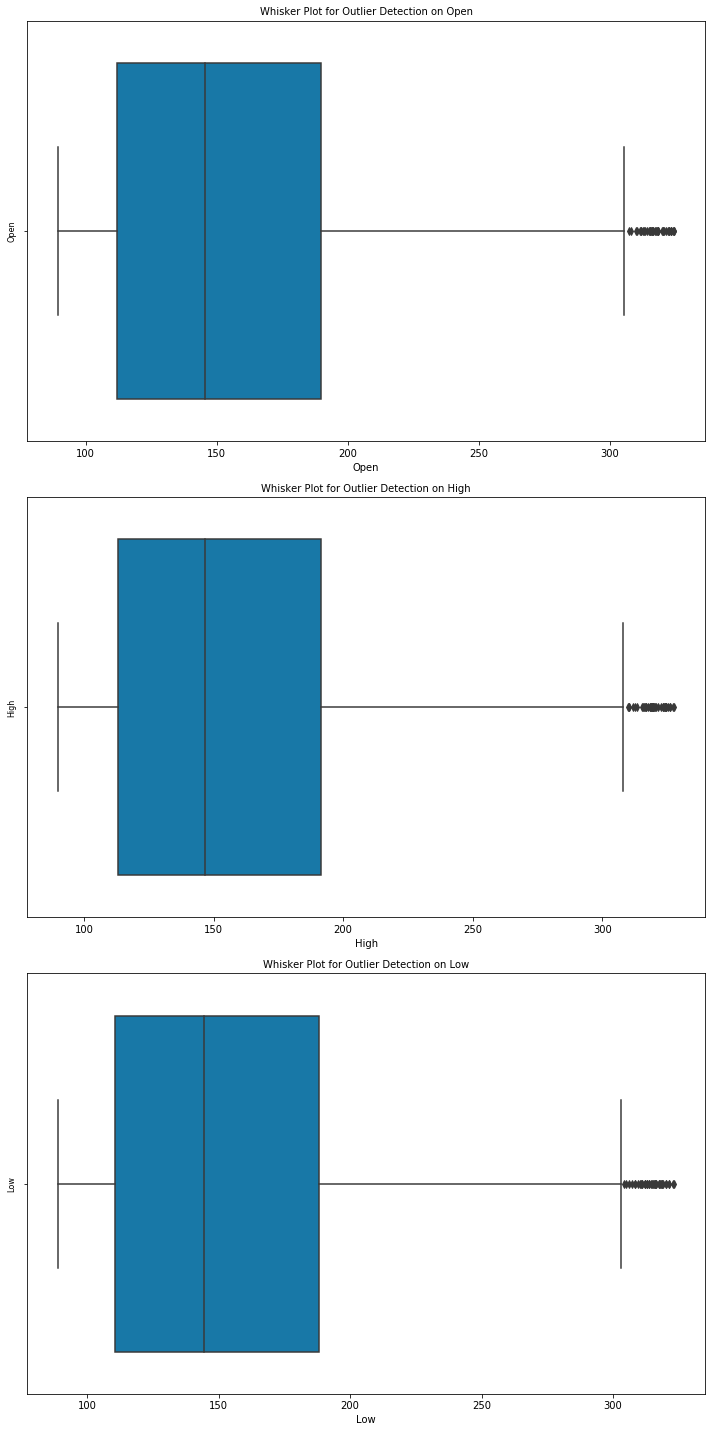

In [27]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

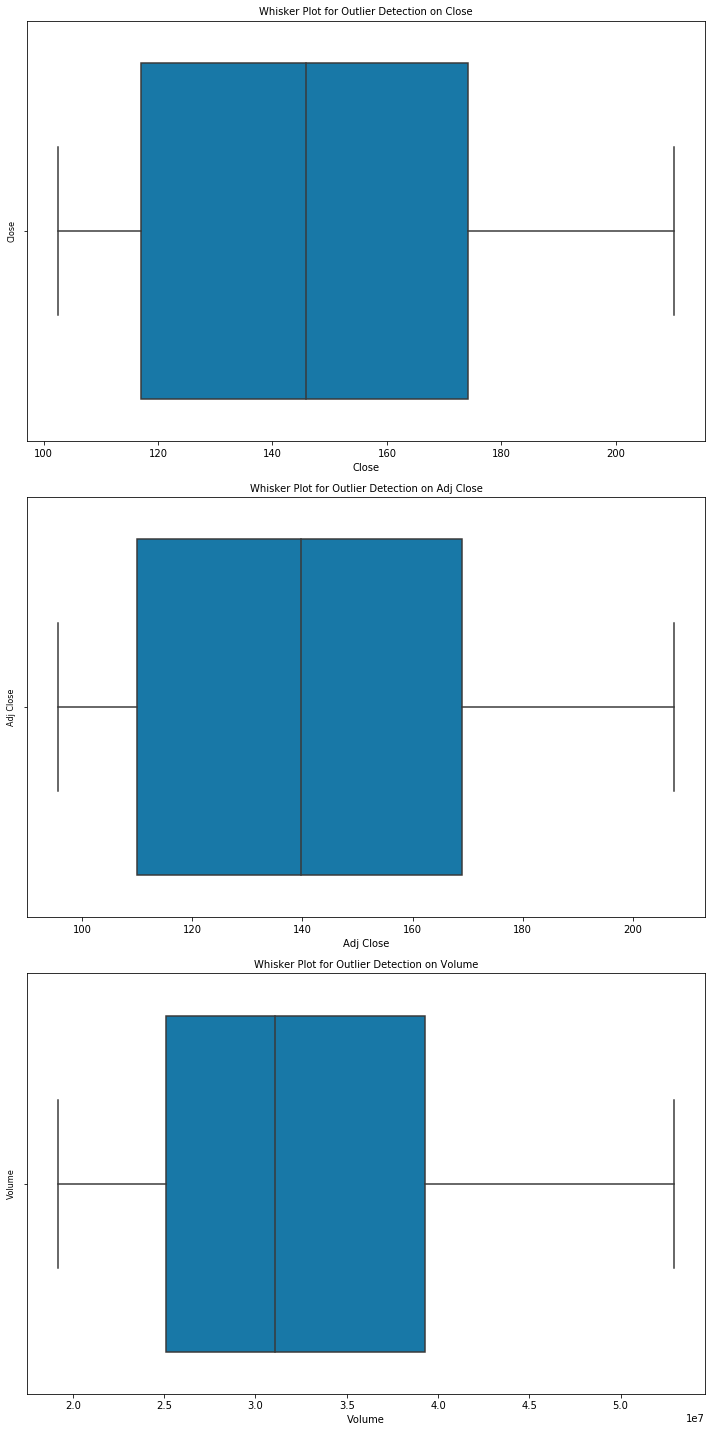

In [36]:
Column_List = ['Close', 'Adj Close', 'Volume']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [42]:
Desp_Statistics=data.describe()
Desp_Statistics=Desp_Statistics.T
Desp_Statistics['IQR']=Desp_Statistics['75%']-Desp_Statistics['25%']
data = data[(np.abs(stats.zscore(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] 
#data = data.reset_index()

just to check if there are any outlier left

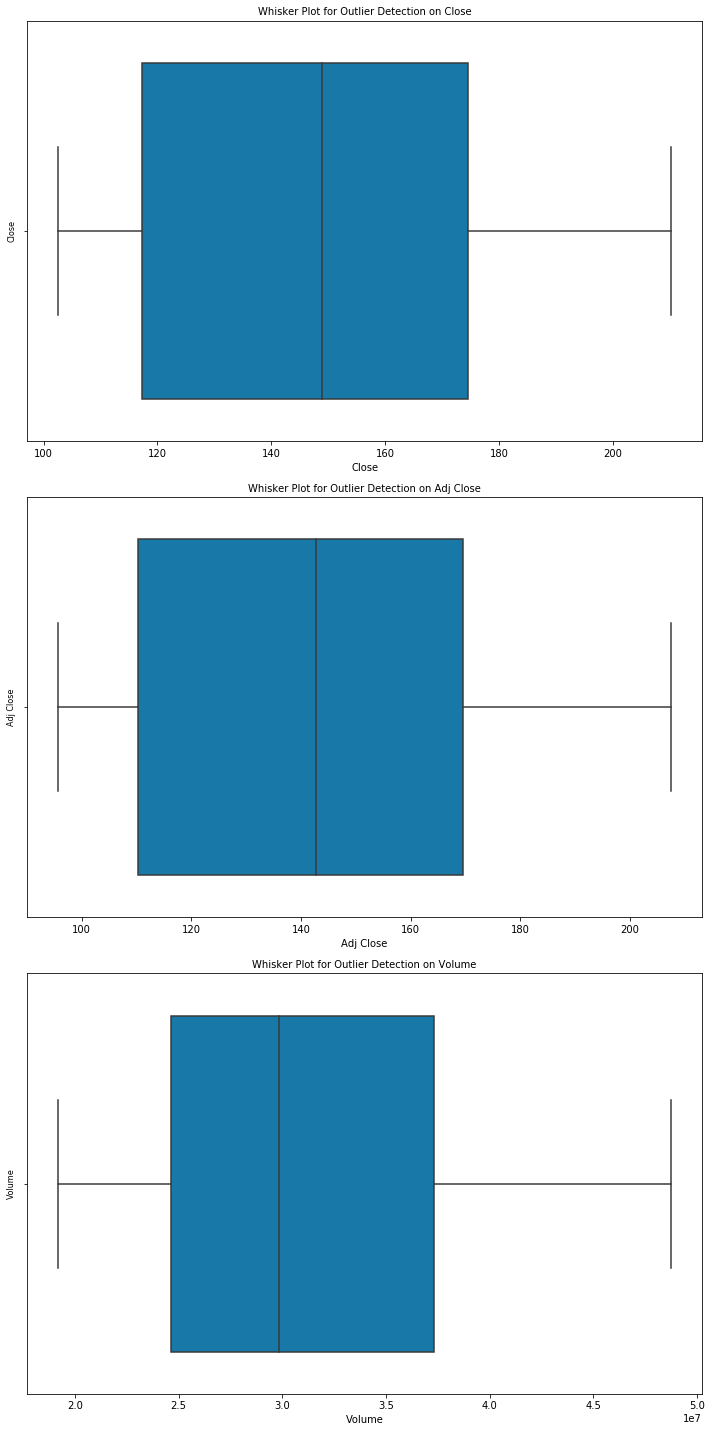

In [43]:
Column_List = ['Close', 'Adj Close', 'Volume']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

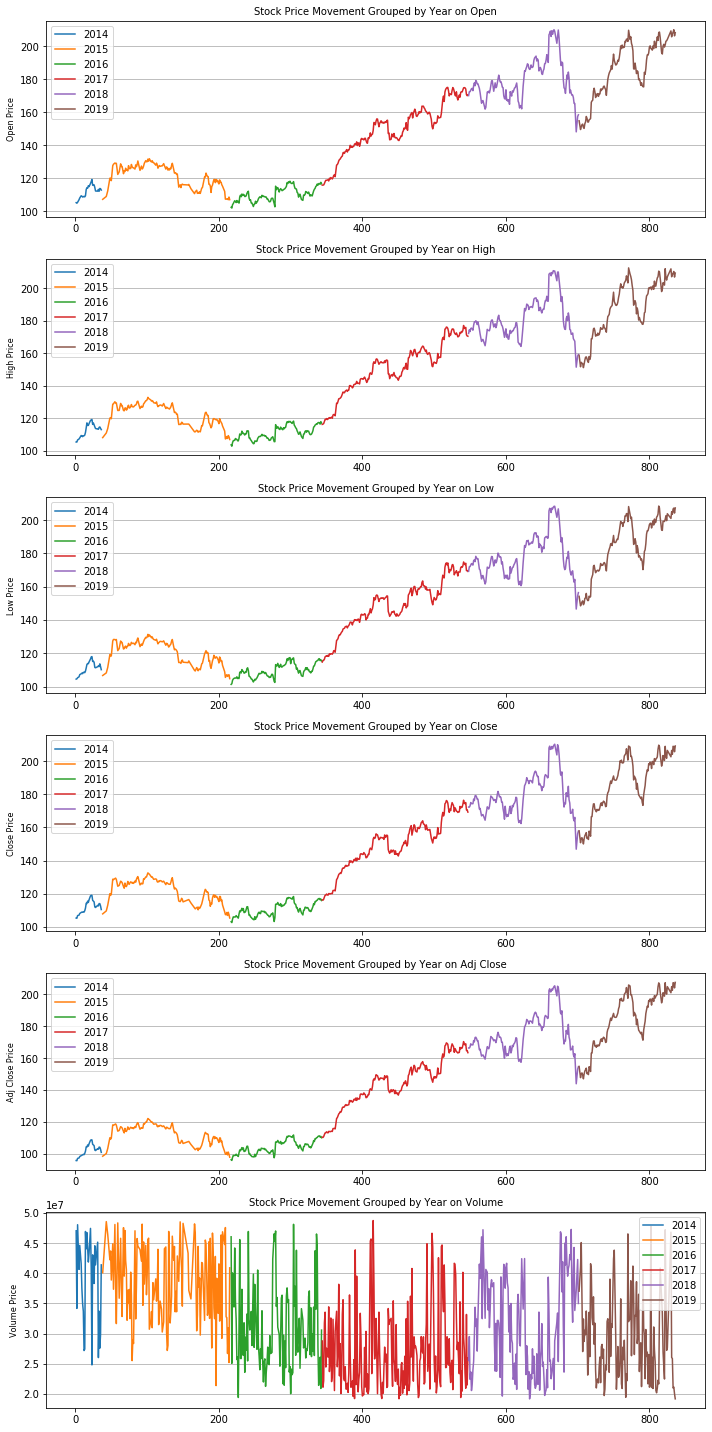

In [45]:
Column_List = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

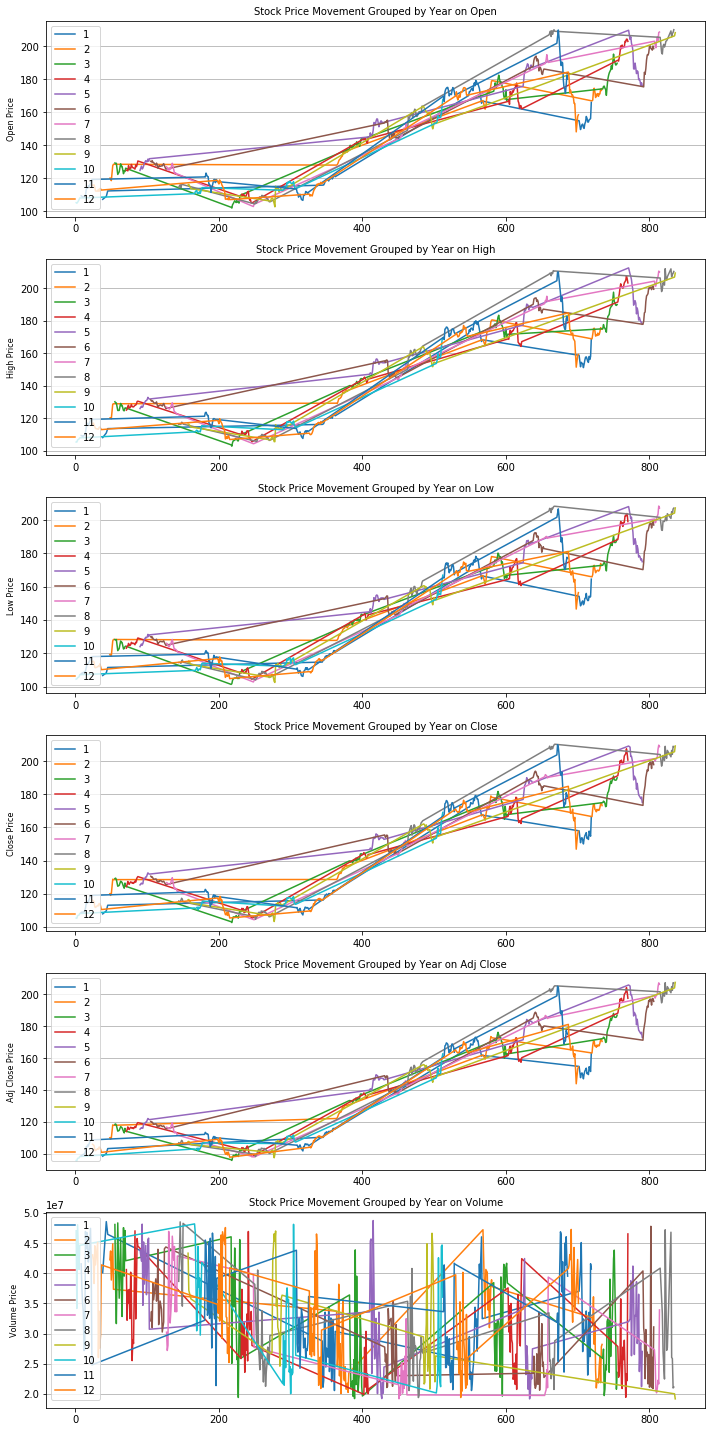

In [52]:
Column_List = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Month')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

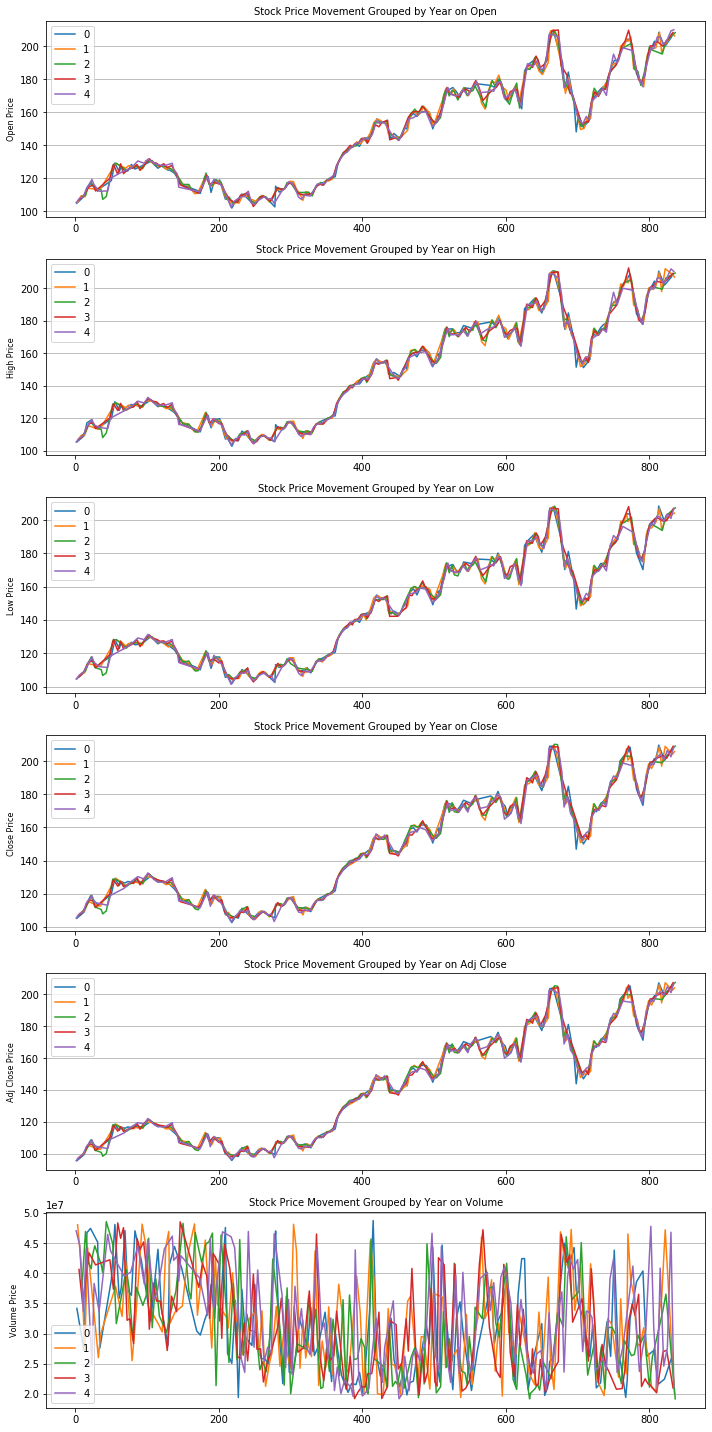

In [53]:
Column_List = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('WeekDay')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

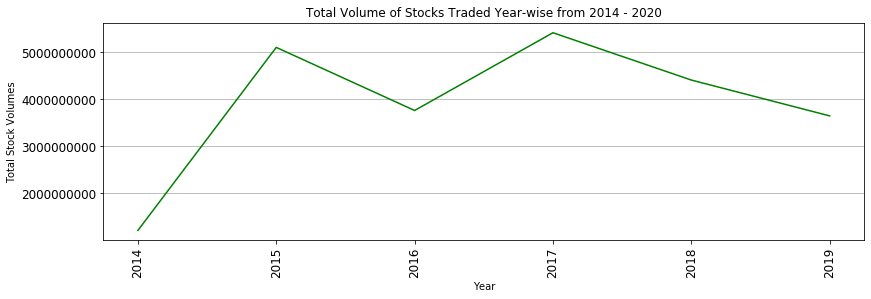

In [56]:
check = data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2014 - 2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

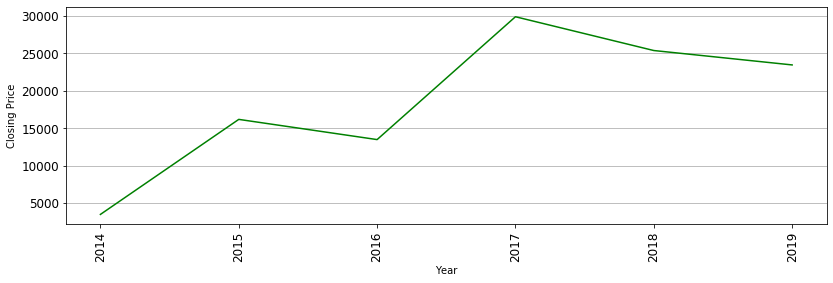

In [61]:
check = data.groupby('Year')['Close'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Close", legend = False, fontsize = 12, sharex = False,  rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Closing Price")
ax1.yaxis.grid(True)

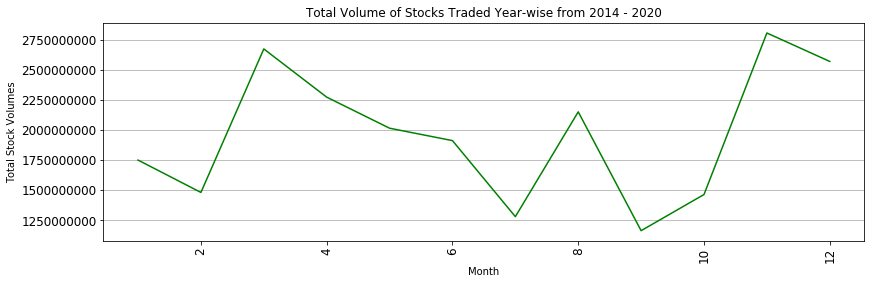

In [57]:
check = data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2014 - 2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

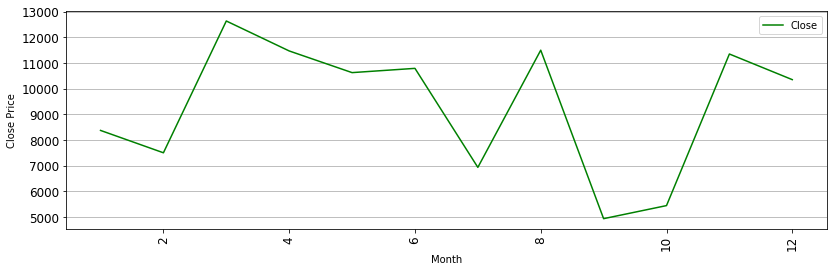

In [66]:
check = data.groupby('Month')['Close'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(122)
check.plot(y = "Close", legend = True, fontsize = 12, sharex = False, rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Close Price")
ax1.yaxis.grid(True)

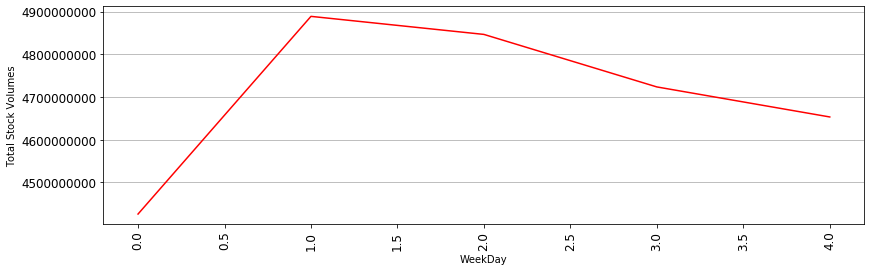

In [69]:
check = data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False,rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

In [70]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Year')[col_list].sum()

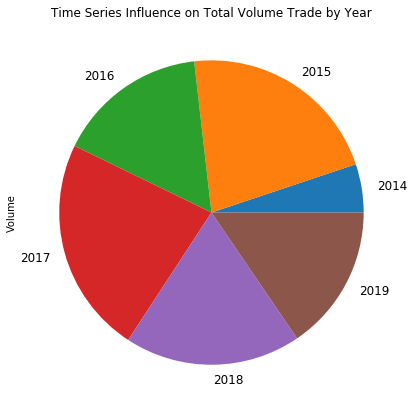

In [71]:
var=pd.DataFrame(var)
# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

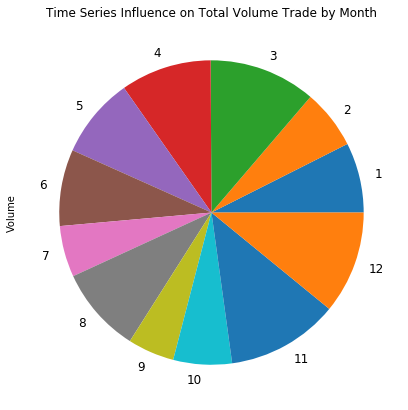

In [72]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

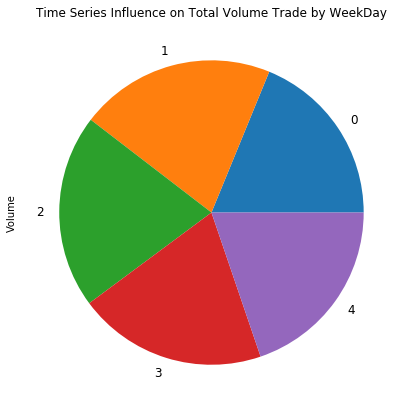

In [73]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('WeekDay')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

Time Series Analysis

In [75]:
df_close = data[['Date','Close']]
df_close['Date'] = df_close['Date'].apply(pd.to_datetime)


In [77]:
df_close.set_index("Date", inplace = True)
df_close.head()

,Close
Date,
2014-10-24,105.220001
2014-10-27,105.110001
2014-10-28,106.739998
2014-10-30,106.980003
2014-10-31,108.000000


In [96]:
# Slicing on year
close_subset = df_close['2015':'2020']

# Slicing on month
close_subset = df_close['2015-01':'2020-5']

#Slicing on day
close_subset = df_close['2015-01-01':'2020-05-27']

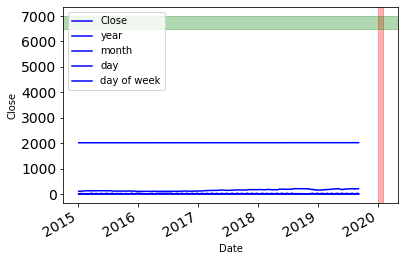

In [103]:
ax = close_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Close')

ax.axvspan('2020-01-01','2020-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

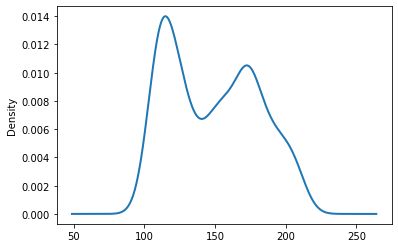

In [104]:
df_close['Close'].plot(kind='density',linewidth=2)

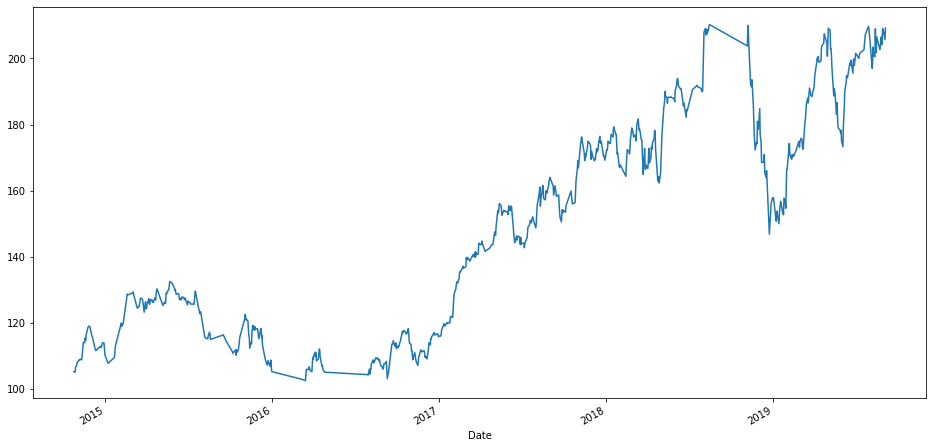

In [105]:
df_close['Close'].plot(figsize=(16,8))


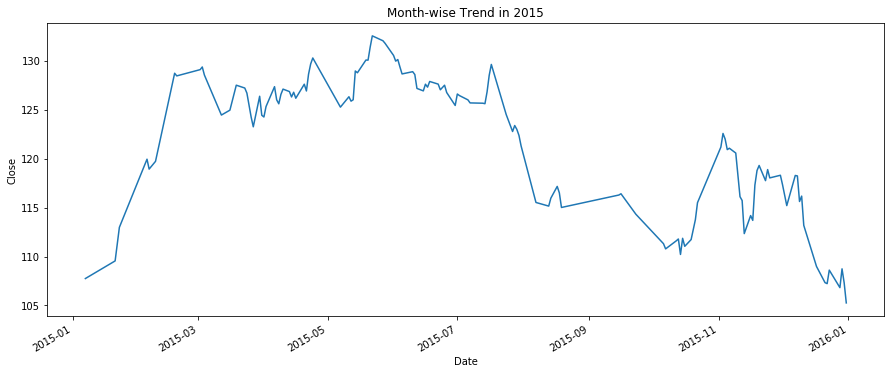

In [108]:
ax = df_close.loc['2015', 'Close'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2015'); 
ax.set_ylabel('Close');

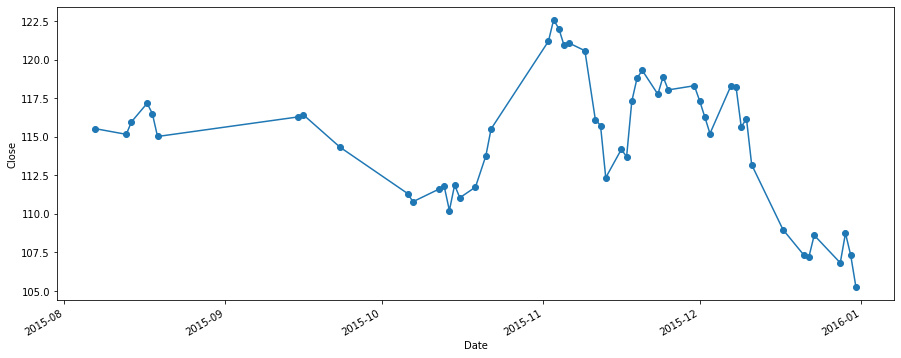

In [93]:
ax = df_close.loc['2015-08':'2016-02','Close'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_ylabel('Close');

In [112]:
df_close.reset_index(inplace=True)
df_close['year'] = df_close.Date.dt.year
df_close['month'] = df_close.Date.dt.month
df_close['day'] = df_close.Date.dt.day
df_close['day of week'] = df_close.Date.dt.dayofweek
df_close['Weekday Name'] = df_close.Date.dt.day_name()

In [113]:
#Set Date column as the index column.
df_close.set_index('Date', inplace=True)
df_close.head()

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
2014-10-24,105.220001,2014,10,24,4,Friday
2014-10-27,105.110001,2014,10,27,0,Monday
2014-10-28,106.739998,2014,10,28,1,Tuesday
2014-10-30,106.980003,2014,10,30,3,Thursday
2014-10-31,108.000000,2014,10,31,4,Friday


In [117]:
df_close.resample(rule = 'A').mean()[:5]

,Close,year,month,day,day of week
Date,,,,,
2014-12-31,112.079032,2014.0,11.193548,17.903226,2.032258
2015-12-31,121.648496,2015.0,7.105263,15.345865,1.939850
2016-12-31,110.481640,2016.0,8.303279,15.983607,1.975410
2017-12-31,150.262311,2017.0,6.386935,15.974874,2.050251
2018-12-31,180.042270,2018.0,5.503546,15.929078,2.014184


Text(0.5, 1.0, 'Yearly Mean close for Tata Steel')

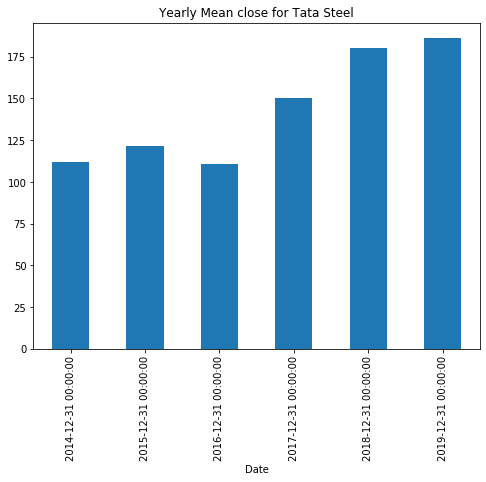

In [118]:
plt.rcParams['figure.figsize'] = (8, 6)
df_close['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean close for Tata Steel')

Text(0.5, 1.0, 'Yearly start Mean close for Tata Steel')

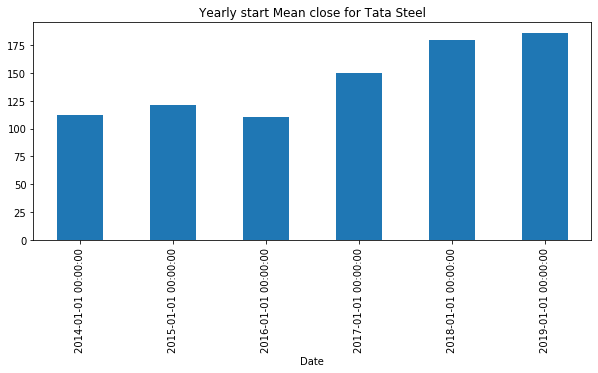

In [119]:
df_close['Close'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean close for Tata Steel')

In [121]:
df_close.shift(1).head()

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
2014-10-24,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-27,105.220001,2014.0,10.0,24.0,4.0,Friday
2014-10-28,105.110001,2014.0,10.0,27.0,0.0,Monday
2014-10-30,106.739998,2014.0,10.0,28.0,1.0,Tuesday
2014-10-31,106.980003,2014.0,10.0,30.0,3.0,Thursday


In [123]:
df_close.shift(-1).head()

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
2014-10-24,105.110001,2014.0,10.0,27.0,0.0,Monday
2014-10-27,106.739998,2014.0,10.0,28.0,1.0,Tuesday
2014-10-28,106.980003,2014.0,10.0,30.0,3.0,Thursday
2014-10-30,108.000000,2014.0,10.0,31.0,4.0,Friday
2014-10-31,108.599998,2014.0,11.0,4.0,1.0,Tuesday


In [124]:
df_close.tshift(periods=3, freq = 'M').head()

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
2014-12-31,105.220001,2014,10,24,4,Friday
2014-12-31,105.110001,2014,10,27,0,Monday
2014-12-31,106.739998,2014,10,28,1,Tuesday
2014-12-31,106.980003,2014,10,30,3,Thursday
2015-01-31,108.000000,2014,10,31,4,Friday


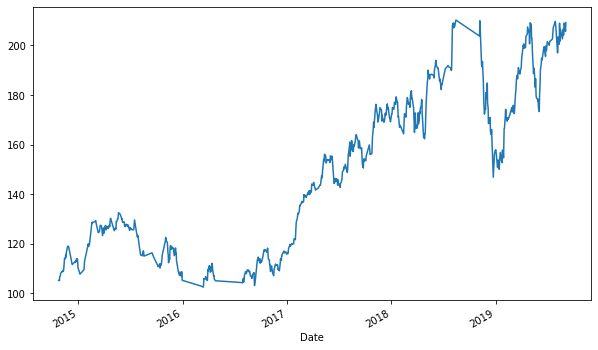

In [125]:
df_close['Close'].plot(figsize = (10,6))

In [126]:
df_close.rolling(7).mean().head(10)

,Close,year,month,day,day of week
Date,,,,,
2014-10-24,NaN,NaN,NaN,NaN,NaN
2014-10-27,NaN,NaN,NaN,NaN,NaN
2014-10-28,NaN,NaN,NaN,NaN,NaN
2014-10-30,NaN,NaN,NaN,NaN,NaN
2014-10-31,NaN,NaN,NaN,NaN,NaN
2014-11-04,NaN,NaN,NaN,NaN,NaN
2014-11-05,107.072857,2014.0,10.285714,21.285714,2.142857
2014-11-06,107.570000,2014.0,10.428571,18.714286,2.000000
2014-11-07,108.127143,2014.0,10.571429,15.857143,2.571429


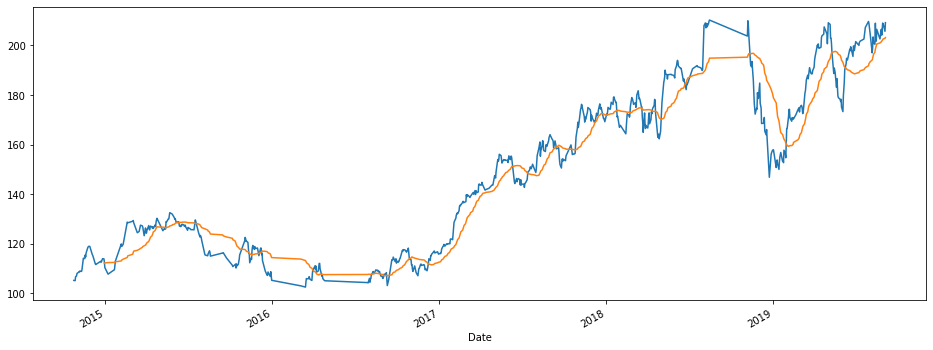

In [127]:
df_close['Close'].plot()
df_close.rolling(window=30).mean()['Close'].plot(figsize=(16, 6))

In [128]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [129]:
data=pd.read_csv('AAPL.csv')

In [130]:
data=data.drop(columns=['Open','High','Low','Volume','Adj Close'])

In [131]:
data=data.rename(columns={'Date':'ds'})
data=data.rename(columns={'Close':'y'})
data

,ds,y
0,2014-05-28,89.144287
1,2014-05-29,90.768570
2,2014-05-30,90.428574
3,2014-06-02,89.807144
4,2014-06-03,91.077141
...,...,...
1506,2020-05-20,319.230011
1507,2020-05-21,316.850006
1508,2020-05-22,318.890015
1509,2020-05-26,316.730011


In [132]:
m=Prophet()
m.fit(data)
predper = 60

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
1566,2020-07-22
1567,2020-07-23
1568,2020-07-24
1569,2020-07-25
1570,2020-07-26


In [134]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1566,2020-07-22,325.235824,310.893060,340.330405
1567,2020-07-23,325.580964,309.484365,341.928362
1568,2020-07-24,325.713973,310.304682,341.400422
1569,2020-07-25,324.422805,308.328125,340.364233
1570,2020-07-26,324.797232,309.729686,341.656093


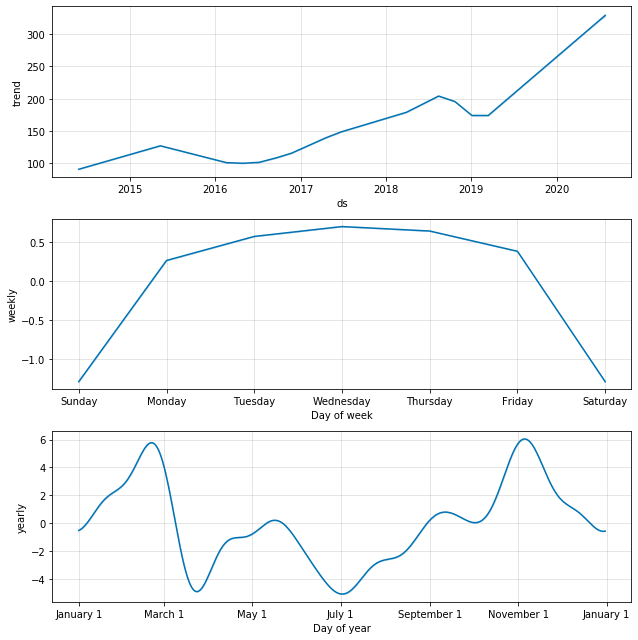

In [135]:
fig2 = m.plot_components(forecast)

In [136]:
df_cv = cross_validation(m, initial='400 days', period='200 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2015-07-28 00:00:00 and 2019-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-07-29,124.832350,122.469514,126.930052,122.989998,2015-07-28
1,2015-07-30,124.717125,122.404773,126.891522,122.370003,2015-07-28
2,2015-07-31,124.662471,122.402692,126.826720,121.300003,2015-07-28
3,2015-08-03,124.459627,122.185955,126.526667,118.440002,2015-07-28
4,2015-08-04,124.140051,121.815575,126.435780,114.639999,2015-07-28


In [137]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,346.374558,18.611141,12.017507,0.078543,0.053359,0.305141
1,38 days,368.988367,19.209070,12.455311,0.081587,0.053384,0.295522
2,39 days,385.484090,19.633749,12.700786,0.083321,0.053854,0.295191
3,40 days,403.601941,20.089847,12.917822,0.085123,0.053854,0.297512
4,41 days,423.194001,20.571680,13.140231,0.086633,0.054024,0.293532


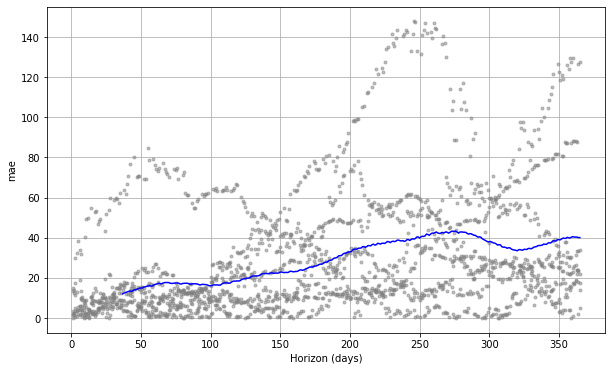

In [141]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')